# SQL Query in Pandas

http://blog.yhat.com/posts/pandasql-sql-for-pandas-dataframes.html

In [50]:
pwd

'/Users/rhadadi/nbopen'

In [21]:
import sas7bdat as sas
import pandasql as pdsql
data = sas.SAS7BDAT('/Users/rhadadi/anaconda3/pkgs/r-haven-1.0.0-r3.4.1_0/lib/R/library/haven/examples/iris.sas7bdat')


In [10]:
df = data.to_data_frame()
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [22]:
pysql = lambda q: pdsql.sqldf(q, globals())


In [25]:
str1 = "select Sepal_Length, Species from df where Petal_Length >= 1.4  limit 3;"


In [26]:
df1 = pysql(str1)
df1.head()

,Sepal_Length,Species
0,5.1,setosa
1,4.9,setosa
2,4.6,setosa


In [29]:
pdsql.sqldf(str1, globals())

,Sepal_Length,Species
0,5.1,setosa
1,4.9,setosa
2,4.6,setosa


In [30]:
str2 = "select Sepal_Length, min(Species) as Species_min, max(Petal_Width) as max_petal from df group by Species order by Sepal_Length DESC;"
pdsql.sqldf(str2, globals())

,Sepal_Length,Species_min,max_petal
0,6.3,virgin,2.5
1,5.9,versic,1.8
2,5.0,setosa,0.6


In [34]:
from pandasql import sqldf
from pandasql import load_meat, load_births

meat = load_meat()
births = load_births()

meat.head()

,date,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
0,1944-01-01,751.0,85.0,1280.0,89.0,NaN,NaN,NaN
1,1944-02-01,713.0,77.0,1169.0,72.0,NaN,NaN,NaN
2,1944-03-01,741.0,90.0,1128.0,75.0,NaN,NaN,NaN
3,1944-04-01,650.0,89.0,978.0,66.0,NaN,NaN,NaN
4,1944-05-01,681.0,106.0,1029.0,78.0,NaN,NaN,NaN


/Users/rhadadi/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:29: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
/Users/rhadadi/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:34: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()


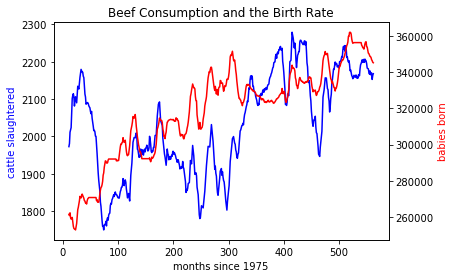

In [35]:
import matplotlib.pyplot as plt
from pandasql import *
import pandas as pd

pysqldf = lambda q: sqldf(q, globals())

q  = """
SELECT
  m.date
  , m.beef
  , b.births
FROM
  meat m
LEFT JOIN
  births b
    ON m.date = b.date
WHERE
    m.date > '1974-12-31';
"""

meat = load_meat()
births = load_births()

df = pysqldf(q)
df.births = df.births.fillna(method='backfill')

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(pd.rolling_mean(df['beef'], 12), color='b')
ax1.set_xlabel('months since 1975')
ax1.set_ylabel('cattle slaughtered', color='b')

ax2 = ax1.twinx()
ax2.plot(pd.rolling_mean(df['births'], 12), color='r')
ax2.set_ylabel('babies born', color='r')
plt.title("Beef Consumption and the Birth Rate")
plt.show()


In [36]:
q = """
    SELECT
        *
    FROM
        meat
    LIMIT 10;"""

print(sqldf(q, locals()))

                         date   beef   veal    pork  lamb_and_mutton broilers  \
0  1944-01-01 00:00:00.000000  751.0   85.0  1280.0             89.0     None   
1  1944-02-01 00:00:00.000000  713.0   77.0  1169.0             72.0     None   
2  1944-03-01 00:00:00.000000  741.0   90.0  1128.0             75.0     None   
3  1944-04-01 00:00:00.000000  650.0   89.0   978.0             66.0     None   
4  1944-05-01 00:00:00.000000  681.0  106.0  1029.0             78.0     None   
5  1944-06-01 00:00:00.000000  658.0  125.0   962.0             79.0     None   
6  1944-07-01 00:00:00.000000  662.0  142.0   796.0             82.0     None   
7  1944-08-01 00:00:00.000000  787.0  175.0   748.0             87.0     None   
8  1944-09-01 00:00:00.000000  774.0  182.0   678.0             91.0     None   
9  1944-10-01 00:00:00.000000  834.0  215.0   777.0            100.0     None   

  other_chicken turkey  
0          None   None  
1          None   None  
2          None   None  
3       

In [42]:
# births per year
q = """ 
    SELECT
        strftime("%Y", date)
        , SUM(births)
    FROM births
    GROUP BY 1
    ORDER BY 1; 
"""

print(sqldf(q, locals()))

   strftime("%Y", date)  SUM(births)
0                  1975      3136965
1                  1976      6304156
2                  1979      3333279
3                  1982      3612258
4                  1983      7333238
5                  1986      7308074
6                  1987      3760561
7                  1988      3756547
8                  1990      7718904
9                  1991     11714356
10                 1993      8194907
11                 1995      4000240
12                 1996      3952767
13                 1997      3899589
14                 1998      3891494
15                 1999      3880894
16                 2000      3941553
17                 2001      8018231
18                 2002      4025933
19                 2003      4021726
20                 2005      8210950
21                 2007      4138349
22                 2008      4265555
23                 2011      4247694
24                 2012      4130665


In [44]:
# joining meats + births on date
q = """
    SELECT
        m.date
        , b.births
        , m.beef
    FROM
        meat m
    INNER JOIN
        births b
            on m.date = b.date
    ORDER BY
        m.date
    LIMIT 100;
    """

joined = pysqldf(q)
print(joined.head())

                         date  births    beef
0  1975-01-01 00:00:00.000000  265775  2106.0
1  1975-02-01 00:00:00.000000  241045  1845.0
2  1975-03-01 00:00:00.000000  268849  1891.0
3  1975-04-01 00:00:00.000000  247455  1895.0
4  1975-05-01 00:00:00.000000  254545  1849.0


In [45]:
meat.head()

,date,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
0,1944-01-01,751.0,85.0,1280.0,89.0,NaN,NaN,NaN
1,1944-02-01,713.0,77.0,1169.0,72.0,NaN,NaN,NaN
2,1944-03-01,741.0,90.0,1128.0,75.0,NaN,NaN,NaN
3,1944-04-01,650.0,89.0,978.0,66.0,NaN,NaN,NaN
4,1944-05-01,681.0,106.0,1029.0,78.0,NaN,NaN,NaN


In [46]:
q = """
    SELECT
        date
        , beef
        , veal
        , pork
        , lamb_and_mutton
    FROM
        meat
    WHERE
        lamb_and_mutton >= veal
    ORDER BY date DESC
    LIMIT 10;
    """

print(pysqldf(q))

                         date    beef  veal    pork  lamb_and_mutton
0  2012-11-01 00:00:00.000000  2206.6  10.1  2078.7             12.4
1  2012-10-01 00:00:00.000000  2343.7  10.3  2210.4             14.2
2  2012-09-01 00:00:00.000000  2016.0   8.8  1911.0             12.5
3  2012-08-01 00:00:00.000000  2367.5  10.1  1997.9             14.2
4  2012-07-01 00:00:00.000000  2200.8   9.5  1721.8             12.5
5  2012-06-01 00:00:00.000000  2252.1   8.9  1750.4             12.4
6  2012-05-01 00:00:00.000000  2232.0  10.4  1926.8             13.6
7  2012-04-01 00:00:00.000000  1990.6   9.9  1841.7             12.9
8  2012-03-01 00:00:00.000000  2159.8  10.0  1987.9             14.2
9  2012-02-01 00:00:00.000000  2009.0   9.8  1882.9             12.3


In [47]:
q = """SELECT 
    *
    FROM
        meat
    ORDER BY RANDOM()
    LIMIT 10;"""
print(pysqldf(q))

                         date    beef   veal    pork  lamb_and_mutton  \
0  1989-12-01 00:00:00.000000  1827.0   25.0  1288.0             31.0   
1  2001-01-01 00:00:00.000000  2205.0   18.0  1693.0             19.0   
2  1975-06-01 00:00:00.000000  1849.0   63.0   889.0             31.0   
3  1965-10-01 00:00:00.000000  1603.0   88.0   920.0             57.0   
4  1956-05-01 00:00:00.000000  1194.0  122.0   777.0             54.0   
5  1996-12-01 00:00:00.000000  1950.0   31.0  1429.0             22.0   
6  1956-11-01 00:00:00.000000  1201.0  141.0  1011.0             58.0   
7  2012-02-01 00:00:00.000000  2009.0    9.8  1882.9             12.3   
8  1981-08-01 00:00:00.000000  1828.0   33.0  1157.0             25.0   
9  2002-01-01 00:00:00.000000  2331.0   16.9  1717.0             17.7   

   broilers  other_chicken  turkey  
0    1491.1            NaN   334.9  
1    2622.2           42.7   461.2  
2     683.1            NaN   138.4  
3     456.9            NaN   262.1  
4       NaN

In [48]:
q = """
        SELECT
            date
            , 'beef' AS meat_type
            , beef AS value
        FROM meat
        UNION ALL
        SELECT
            date
            , 'veal' AS meat_type
            , veal AS value
        FROM meat
        
        UNION ALL
        
        SELECT
            date
            , 'pork' AS meat_type
            , pork AS value
        FROM meat
        UNION ALL
        SELECT
            date
            , 'lamb_and_mutton' AS meat_type
            , lamb_and_mutton AS value
        FROM meat
        ORDER BY 1
    """
print(pysqldf(q).head(20))

                          date        meat_type   value
0   1944-01-01 00:00:00.000000             beef   751.0
1   1944-01-01 00:00:00.000000             veal    85.0
2   1944-01-01 00:00:00.000000             pork  1280.0
3   1944-01-01 00:00:00.000000  lamb_and_mutton    89.0
4   1944-02-01 00:00:00.000000             beef   713.0
5   1944-02-01 00:00:00.000000             veal    77.0
6   1944-02-01 00:00:00.000000             pork  1169.0
7   1944-02-01 00:00:00.000000  lamb_and_mutton    72.0
8   1944-03-01 00:00:00.000000             beef   741.0
9   1944-03-01 00:00:00.000000             veal    90.0
10  1944-03-01 00:00:00.000000             pork  1128.0
11  1944-03-01 00:00:00.000000  lamb_and_mutton    75.0
12  1944-04-01 00:00:00.000000             beef   650.0
13  1944-04-01 00:00:00.000000             veal    89.0
14  1944-04-01 00:00:00.000000             pork   978.0
15  1944-04-01 00:00:00.000000  lamb_and_mutton    66.0
16  1944-05-01 00:00:00.000000             beef 

In [49]:
q = """
    SELECT 
        m1.date
        , m1.beef 
    FROM 
        meat m1 
    WHERE m1.date IN 
        (SELECT 
            date 
        FROM meat 
        WHERE 
            beef >= broilers 
        ORDER BY date)
"""

more_beef_than_broilers = pysqldf(q)
print(more_beef_than_broilers.head(10))

                         date    beef
0  1960-01-01 00:00:00.000000  1196.0
1  1960-02-01 00:00:00.000000  1089.0
2  1960-03-01 00:00:00.000000  1201.0
3  1960-04-01 00:00:00.000000  1066.0
4  1960-05-01 00:00:00.000000  1202.0
5  1960-06-01 00:00:00.000000  1247.0
6  1960-07-01 00:00:00.000000  1166.0
7  1960-08-01 00:00:00.000000  1307.0
8  1960-09-01 00:00:00.000000  1298.0
9  1960-10-01 00:00:00.000000  1263.0
